# Import Dataset

In [2]:
import pandas as pd

In [3]:
file_path = "./data/IMDB Dataset.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Explore Dataset 

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='sentiment', ylabel='count'>

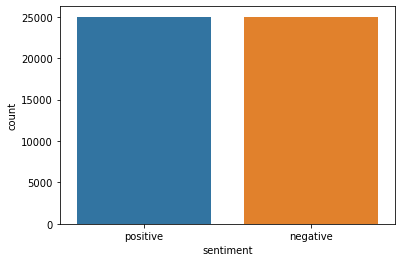

In [6]:
sns.countplot(x="sentiment", data=df)

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

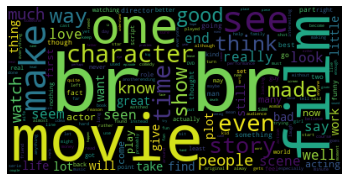

In [8]:
all_reviews = df["review"].tolist()
all_reviews_as_one_string = " ".join(all_reviews)
plt.imshow(WordCloud().generate(all_reviews_as_one_string))
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

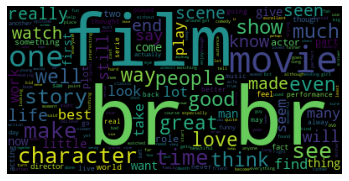

In [9]:
positive_reviews = df.loc[df['sentiment'] == "positive", "review"].tolist()
positive_reviews_as_one_string = " ".join(positive_reviews)
plt.imshow(WordCloud().generate(positive_reviews_as_one_string))
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

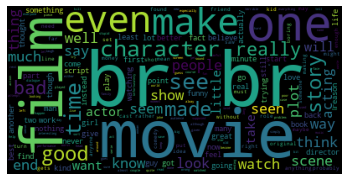

In [10]:
negative_reviews = df.loc[df['sentiment'] == "negative", "review"].tolist()
negative_reviews_as_one_string = " ".join(negative_reviews)
plt.imshow(WordCloud().generate(negative_reviews_as_one_string))
plt.axis("off")

# Preprocessing

In [11]:
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('punkt')

In [12]:
STOP_WORDS = nltk.corpus.stopwords.words('english')
print(len(STOP_WORDS))
print(STOP_WORDS)

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [13]:
import re
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer


In [131]:
def preprocessing(text):
    text = re.sub(r'[0-9]+', '', text)   # 移除數字
    text = re.sub(r'[^\w\s]', ' ', text) # 移除標點符號
    text = text.lower()                  # 小寫
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in "br"]    # 移除 br
    tokens = [WordNetLemmatizer().lemmatize(token) for token in tokens]   # lemmatization
    for i in range(0, len(tokens)- 1):
        if tokens[i] == "t" or tokens[i] == "not" :
            tokens[i] = "n't"
    tokens = [token for token in tokens if token not in STOP_WORDS]      # 移除停用詞
    return tokens

In [132]:
df.at[1,"review"]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [133]:
text_clean = preprocessing(df.at[1,"review"])
print(text_clean)

['wonderful', 'little', 'production', 'filming', 'technique', 'unassuming', 'old', 'time', 'bbc', 'fashion', 'give', 'comforting', 'sometimes', 'discomforting', 'sense', 'realism', 'entire', 'piece', 'actor', 'extremely', 'well', 'chosen', 'michael', 'sheen', "n't", 'ha', 'got', 'polari', 'ha', 'voice', 'pat', 'truly', 'see', 'seamless', 'editing', 'guided', 'reference', 'williams', 'diary', 'entry', "n't", 'well', 'worth', 'watching', 'terrificly', 'written', 'performed', 'piece', 'masterful', 'production', 'one', 'great', 'master', 'comedy', 'life', 'realism', 'really', 'come', 'home', 'little', 'thing', 'fantasy', 'guard', 'rather', 'use', 'traditional', 'dream', 'technique', 'remains', 'solid', 'disappears', 'play', 'knowledge', 'sens', 'particularly', 'scene', 'concerning', 'orton', 'halliwell', 'set', 'particularly', 'flat', 'halliwell', 'mural', 'decorating', 'every', 'surface', 'terribly', 'well', 'done']


In [134]:
df_clean = df["review"].apply(preprocessing)

In [135]:
def join_word(word_list):
    return ' '.join(word_list)
df_clean_joined = df_clean.apply(join_word)
df_clean_joined

0        one reviewer ha mentioned watching oz episode ...
1        wonderful little production filming technique ...
2        thought wa wonderful way spend time hot summer...
3        basically family little boy jake think zombie ...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job n't creative orig...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary school nu...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movie high art fan expec...
Name: review, Length: 50000, dtype: object

(-0.5, 399.5, 199.5, -0.5)

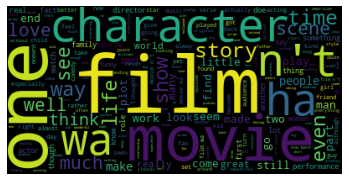

In [136]:
positive_reviews_clean = df_clean_joined[df['sentiment'] == "positive"].tolist()
positive_reviews_clean_as_one_string = " ".join(positive_reviews_clean)
plt.imshow(WordCloud().generate(positive_reviews_clean_as_one_string))
plt.axis("off")


(-0.5, 399.5, 199.5, -0.5)

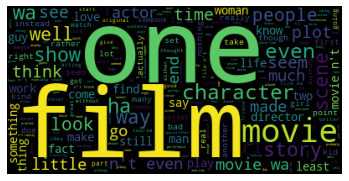

In [137]:
negative_reviews_clean = df_clean_joined[df['sentiment'] == "negative"].tolist()
negative_reviews_clean_as_one_string = " ".join(negative_reviews_clean)
plt.imshow(WordCloud().generate(negative_reviews_clean_as_one_string))
plt.axis("off")

In [138]:
from gensim.models.word2vec import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

In [139]:
wv_size = 100

In [23]:
import gensim.downloader
glove_100 = gensim.downloader.load('glove-twitter-100')

In [24]:
glove_100["bad"]

array([ 2.3972e-01, -2.0459e-01, -1.8685e-01, -4.1379e-02,  3.3802e-02,
        4.9573e-01,  6.0611e-01, -4.6954e-03, -5.0117e-01, -3.3209e-01,
       -1.4699e-01, -1.9325e-01, -6.8035e-01,  8.0456e-02,  2.3478e-01,
       -2.8793e-01, -5.9723e-02,  1.1879e-01, -2.4096e-01,  6.6975e-02,
        3.2918e-01, -1.4400e-01,  4.4740e-01,  3.3374e-01, -8.2736e-02,
        7.4262e-01, -3.5810e-01,  4.6827e-02, -4.5762e-01, -6.3808e-01,
       -3.2604e-02,  5.6173e-03, -7.3558e-01,  8.4437e-02, -5.6265e-01,
        2.3030e-01, -3.7681e-01, -1.6618e-01, -6.7039e-02, -5.4390e-02,
       -7.5946e-02,  2.9084e-01, -4.7116e-01, -6.6138e-01, -3.2906e-01,
       -9.1393e-02,  4.8968e-01,  5.3554e-01,  6.1788e-02,  2.9762e-01,
        1.9385e-01,  3.3641e-01,  5.3673e-03,  1.3721e-01,  8.6339e-02,
       -1.7380e-01, -1.1245e-01,  1.2181e-01, -3.0412e-01, -5.7721e-02,
       -1.9311e-01, -3.2900e-02,  1.3533e-01, -2.1472e-01, -2.4497e-01,
       -2.4219e-01, -7.2960e-03,  2.5958e-01, -4.7807e-02,  1.73

In [140]:
w2v_model = Word2Vec(sentences=df_clean, vector_size=wv_size)

In [141]:
w2v_model.wv["bad"]

array([-1.5347669 , -0.9987967 , -0.11542971, -1.340166  , -0.98742175,
       -1.1884623 , -0.7541973 ,  0.5974488 ,  0.6944568 , -2.3222873 ,
       -0.0203877 , -0.9657138 ,  0.2585491 ,  0.33628848,  2.340989  ,
        0.11511647, -2.5769017 , -0.53424525,  0.6397623 , -1.265835  ,
        0.89926076,  1.0476404 , -0.32106718, -1.5151372 ,  1.1592842 ,
        1.392748  ,  1.6079179 ,  1.2509921 , -0.23385   ,  1.2411728 ,
        0.21607421, -0.9921682 , -0.7029643 ,  0.16117084, -0.22889897,
        0.06396324, -1.1019037 , -0.00359686, -1.2304842 ,  0.07846254,
       -0.3854261 ,  1.4926841 , -0.65736544, -1.0770631 , -0.4439795 ,
        0.13365096,  0.35846758,  1.2081516 , -1.4532487 , -0.2517612 ,
       -1.1135782 ,  0.31840816,  0.0234363 ,  0.12371923,  1.1242524 ,
       -0.48218203, -0.80526656, -0.3646064 , -1.3411151 , -0.36397925,
       -0.11190745,  1.3522756 , -0.02512152, -1.6008307 ,  1.2274778 ,
       -1.4043869 , -0.6217314 , -0.06697214,  0.9373366 , -1.24

In [27]:
sims = w2v_model.wv.most_similar("bad", topn=10)  # get other similar words
sims

[('terrible', 0.6987934112548828),
 ('awful', 0.69349205493927),
 ('horrible', 0.678230345249176),
 ('lousy', 0.6664961576461792),
 ('suck', 0.6151422262191772),
 ('atrocious', 0.5939782857894897),
 ('good', 0.592965304851532),
 ('crappy', 0.5719975829124451),
 ('lame', 0.5577277541160583),
 ('horrid', 0.5568634867668152)]

In [142]:
tfidf_vectorizer = TfidfVectorizer(smooth_idf=True, use_idf=True)
X_tfidf = tfidf_vectorizer.fit_transform(df_clean_joined)
tfidf = dict(zip(tfidf_vectorizer.get_feature_names(), tfidf_vectorizer.idf_))
tfidf

{'__': 11.12665110365034,
 '___': 10.721185995542177,
 '____': 9.873888135154973,
 '_____': 10.433503923090395,
 '______': 10.721185995542177,
 '_______': 11.12665110365034,
 '________': 10.721185995542177,
 '_________': 11.12665110365034,
 '_____________________________': 11.12665110365034,
 '____________________________________': 11.12665110365034,
 '_____________________________________': 11.12665110365034,
 '______________________________________': 11.12665110365034,
 '______________________________________________': 11.12665110365034,
 '________________________________________________________________': 11.12665110365034,
 '__________________________________________________________________': 10.721185995542177,
 '___is': 11.12665110365034,
 '_a': 10.433503923090395,
 '_about_': 11.12665110365034,
 '_absolute': 11.12665110365034,
 '_absurdism': 11.12665110365034,
 '_all_': 11.12665110365034,
 '_almost_': 11.12665110365034,
 '_am_': 11.12665110365034,
 '_amadeus_': 11.12665110365034,

In [29]:
tfidf["bad"]

2.4447912906788694

In [30]:
tfidf["movie"]

1.4332983345536507

In [143]:
import numpy as np
import math
def build_word_vector(sentence, wv_size):
    vec = np.zeros(wv_size)
    count = 0
    for token in sentence.split():
        try:
            vec += np.array(glove_100[token]) * tfidf[token]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

In [145]:
X = list()
for i in range(0,len(df_clean_joined.index)):
    X.append(build_word_vector(df_clean_joined[i], wv_size))
X=np.array(X)

In [146]:
Y = np.array([1 if df.loc[i, "sentiment"] == "positive" else 0 for i in range(0,len(df.index))])

In [147]:
X

array([[-3.06569336e-01, -1.30806947e-01, -1.70923739e-01, ...,
         9.32677509e-01,  1.72730477e-02, -1.12136170e+00],
       [-1.75209751e-01, -7.08690807e-02,  8.92748645e-03, ...,
         8.48876321e-01, -3.67826440e-01, -1.35688212e+00],
       [-4.64206108e-01,  1.58468233e-01, -3.42156619e-01, ...,
         7.50820515e-01, -2.74263076e-01, -1.01912366e+00],
       ...,
       [-3.48254751e-01,  4.83293356e-01,  8.53015101e-02, ...,
         6.04927977e-01, -6.16557063e-01, -7.91830579e-01],
       [-3.35058433e-01,  1.76991024e-01,  3.88544824e-02, ...,
         8.78478042e-01,  7.37710829e-03, -9.59135302e-01],
       [ 1.94737347e-01,  7.86895023e-01, -3.72158950e-01, ...,
         6.69565670e-01, -8.67078165e-04, -3.51134172e-01]])

In [148]:
from sklearn.preprocessing import StandardScaler
std_scaler= StandardScaler()
std_scaled_X = std_scaler.fit_transform(X)
std_scaled_X

array([[-0.72220458, -1.36269565, -0.22831068, ...,  0.67278454,
         0.61888889, -0.89434745],
       [-0.26154273, -1.16365798,  0.43864581, ...,  0.39154321,
        -0.65443497, -1.49139999],
       [-1.27501727, -0.40208991, -0.86330707, ...,  0.0624626 ,
        -0.34506955, -0.63517041],
       ...,
       [-0.86839018,  0.67656772,  0.72186963, ..., -0.42716068,
        -1.47685786, -0.05897447],
       [-0.82211232, -0.34058066,  0.54962645, ...,  0.49088819,
         0.58616816, -0.48309783],
       [ 1.03581606,  1.6847479 , -0.97456708, ..., -0.21023307,
         0.55890892,  1.0582064 ]])

In [149]:
reshaped_X = X[...,None]

# Classification

In [154]:
from tensorflow import keras
from tensorflow.keras import layers
dnn_model = keras.Sequential(
    [
        layers.Input(shape=(wv_size,)),
        layers.Dense(128, activation="relu", activity_regularizer = "l2"),
        layers.Dropout(0.3),
        layers.Dense(128, activation="relu", activity_regularizer = "l2"),
        layers.Dropout(0.3),
        layers.Dense(64, activation="relu", activity_regularizer = "l2"),
        layers.Dropout(0.3),
        layers.Dense(64, activation="relu", activity_regularizer = "l2"),
        layers.Dropout(0.3),
        layers.Dense(1, activation="sigmoid")
    ]
)

In [155]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=500,
    decay_rate=0.7)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
dnn_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [156]:
history = dnn_model.fit(std_scaled_X, Y, epochs=20, validation_split=0.2, batch_size=200)

Epoch 1/20
200/200 [==============================] - 2s 6ms/step - loss: 0.9897 - accuracy: 0.5867 - val_loss: 0.6440 - val_accuracy: 0.7885
Epoch 2/20
200/200 [==============================] - 1s 5ms/step - loss: 0.5870 - accuracy: 0.7854 - val_loss: 0.5112 - val_accuracy: 0.8137
Epoch 3/20
200/200 [==============================] - 1s 4ms/step - loss: 0.5150 - accuracy: 0.8062 - val_loss: 0.4771 - val_accuracy: 0.8154
Epoch 4/20
200/200 [==============================] - 1s 4ms/step - loss: 0.4767 - accuracy: 0.8194 - val_loss: 0.4631 - val_accuracy: 0.8184
Epoch 5/20
200/200 [==============================] - 1s 4ms/step - loss: 0.4549 - accuracy: 0.8258 - val_loss: 0.4512 - val_accuracy: 0.8200
Epoch 6/20
200/200 [==============================] - 1s 4ms/step - loss: 0.4366 - accuracy: 0.8336 - val_loss: 0.4465 - val_accuracy: 0.8176
Epoch 7/20
200/200 [==============================] - 1s 4ms/step - loss: 0.4164 - accuracy: 0.8417 - val_loss: 0.4403 - val_accuracy: 0.8185
Epoch 

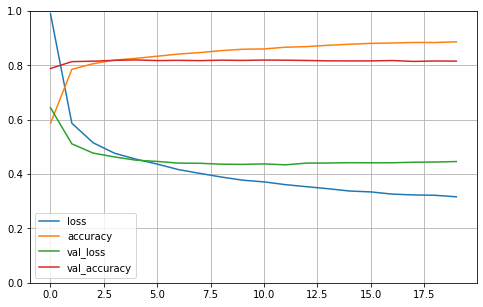

In [157]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [162]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler= MinMaxScaler()
minmax_scaled_X = minmax_scaler.fit_transform(X)
minmax_scaled_X

array([[0.46261985, 0.33697702, 0.47120554, ..., 0.51271394, 0.53316218,
        0.4411301 ],
       [0.50039779, 0.3527371 , 0.51766881, ..., 0.48819119, 0.44134345,
        0.38364291],
       [0.4172848 , 0.41303915, 0.42696876, ..., 0.45949712, 0.46365163,
        0.46608495],
       ...,
       [0.45063146, 0.4984488 , 0.53739949, ..., 0.41680459, 0.38203896,
        0.52156396],
       [0.45442661, 0.41790954, 0.52540024, ..., 0.49685355, 0.53080271,
        0.48072725],
       [0.60679155, 0.57827794, 0.41921787, ..., 0.43571952, 0.52883706,
        0.62913169]])

In [163]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [164]:
from sklearn.naive_bayes import MultinomialNB
NB_clf = MultinomialNB()
NB_clf.fit(minmax_scaled_X, Y) # X 不能為負
Y_pred = cross_val_predict(NB_clf, minmax_scaled_X, Y, cv=5)
confusion_matrix(Y, Y_pred)

array([[18547,  6453],
       [ 6683, 18317]], dtype=int64)

In [165]:
from sklearn.model_selection import cross_val_score
cross_val_score(NB_clf, minmax_scaled_X, Y, cv=5)

array([0.7397, 0.7347, 0.7362, 0.7354, 0.7404])

In [166]:
from sklearn.svm import SVC
svm_clf = SVC()
Y_pred = cross_val_predict(svm_clf, X, Y, cv=5)
confusion_matrix(Y, Y_pred)

array([[20336,  4664],
       [ 4441, 20559]], dtype=int64)

In [167]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm_clf, X, Y, cv=5)

array([0.8191, 0.8177, 0.8143, 0.8155, 0.8229])

In [168]:
svm_clf_std_scaler = SVC()
Y_pred = cross_val_predict(svm_clf_std_scaler, std_scaled_X, Y, cv=5)
confusion_matrix(Y, Y_pred)

array([[20597,  4403],
       [ 3791, 21209]], dtype=int64)

In [169]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm_clf_std_scaler, std_scaled_X, Y, cv=5)